## Importing essential libraries

In [ ]:
# Importing essential libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd 
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [ ]:
# Loading data from CSV files into pandas DataFrames
store_data = pd.read_csv('stores.csv')

In [ ]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
# Loading data from CSV files into pandas Features DataFrames
feature_data= pd.read_csv('features.csv')

In [ ]:
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
# Loading training data
train_data= pd.read_csv('train.csv')

In [ ]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
# Loading test data
test_data = pd.read_csv('test.csv')

In [ ]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Data Pre-Processing 

### First we merge the 3 datasets to visualise the data

In [ ]:
df1= train_data.merge(feature_data, how='inner', on=['Store', 'Date','IsHoliday'])
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [ ]:
df1=df1.merge(store_data, how='inner', on=['Store'])
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


### Converting date variable to date-time object

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day
df1['Week_of_year'] = df1['Date'].dt.isocalendar().week*1.0
df1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0


In [ ]:
df1['Week_of_year'].head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: Week_of_year, dtype: Float64

In [ ]:
df1['Week_of_year'].tail()

421565    43.0
421566    43.0
421567    43.0
421568    43.0
421569    43.0
Name: Week_of_year, dtype: Float64

In [ ]:
df1['Date'].head()

0   2010-02-05
1   2010-02-05
2   2010-02-05
3   2010-02-05
4   2010-02-05
Name: Date, dtype: datetime64[ns]

In [ ]:
df1['Date'].tail()

421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

The day of week on each date is Friday, so the day_of_week analysis is useless. Also, our data is from 5th of February 2010 to 26th of October 2012.

### Checking for missing Values

In [ ]:
df1.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Day                  0
Week_of_year         0
dtype: int64

Except for 'MarkDown' columns, there are no missing values for all other colunms. The MarkDown columns represent Walmart clearance activities, which occurrs in different stores at different time. In this case, it is normal to see many NaN values in these columns.

Weekly sales cannot be less than or equal to zero. So lets look if your data has any such values

In [ ]:
df1[df1['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,19,7.0
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315,2010,3,12,10.0
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315,2010,10,8,40.0
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315,2011,1,21,3.0
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315,2011,3,11,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221,2012,5,25,21.0
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221,2012,6,29,26.0
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221,2012,8,3,31.0
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221,2012,8,31,35.0


1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

In [ ]:
#Deleting rows with incorrect sales values
df1= df1[df1['Weekly_Sales']>0]

## Exploratory Data Analysis

In [ ]:
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5.0


In [ ]:
df1= df1.fillna(0)

In [ ]:
df1.to_csv('csv.csv',encoding='utf-8',index= False)

### Is Holiday vs Weekly sales

Text(0, 0.5, 'Count')

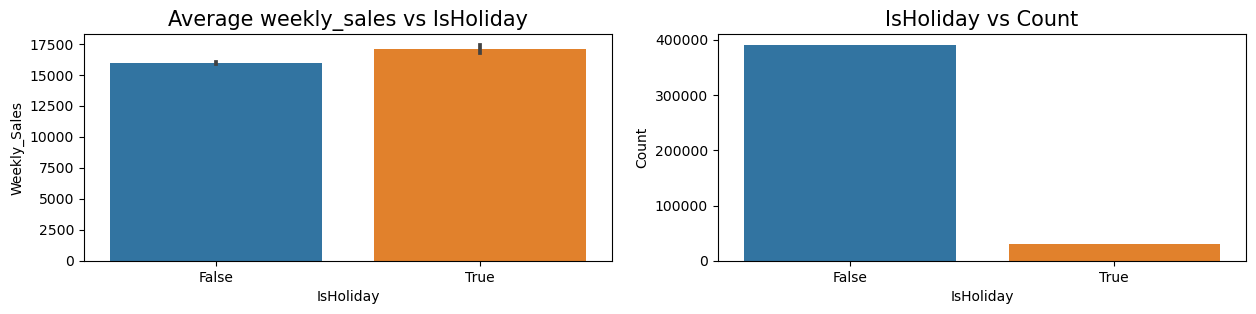

In [ ]:
counts=df1['IsHoliday'].value_counts()
fig, axes = plt.subplots(1,2, figsize=(15,3), dpi=100)

plt_1= sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df1,ax=axes[0])
plt_1.set_title('Average weekly_sales vs IsHoliday', fontsize=15)

plt_2= sns.barplot(x=df1['IsHoliday'].unique(), y=df1['IsHoliday'].value_counts(),ax=axes[1])
plt_2.set_title('IsHoliday vs Count',fontsize=15)
plt_2.set_xlabel('IsHoliday')
plt_2.set_ylabel('Count')

It can be clearly seen that the average sales per week is much higher for holiday weeks altough holidays accounts for very less portion of our data.

### Holiday Dates

In [ ]:
df1[df1['IsHoliday']==True]['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11

Christmas: 31-Dec-10, 30-Dec-11



### Store type popularity

In [ ]:
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0


Text(0.5, 1.0, 'Store type popularities')

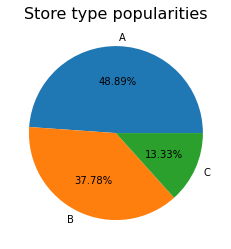

In [ ]:
plt.pie(store_data['Type'].value_counts(normalize=True)*100, labels = df1['Type'].unique(), autopct='%.2f%%')
plt.title('Store type popularities', fontsize=16)

Store Type A consists of the majority of all stores

### Relationship between store type and store size 

In [ ]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Text(0.5, 1.0, 'Store size vs Store Type')

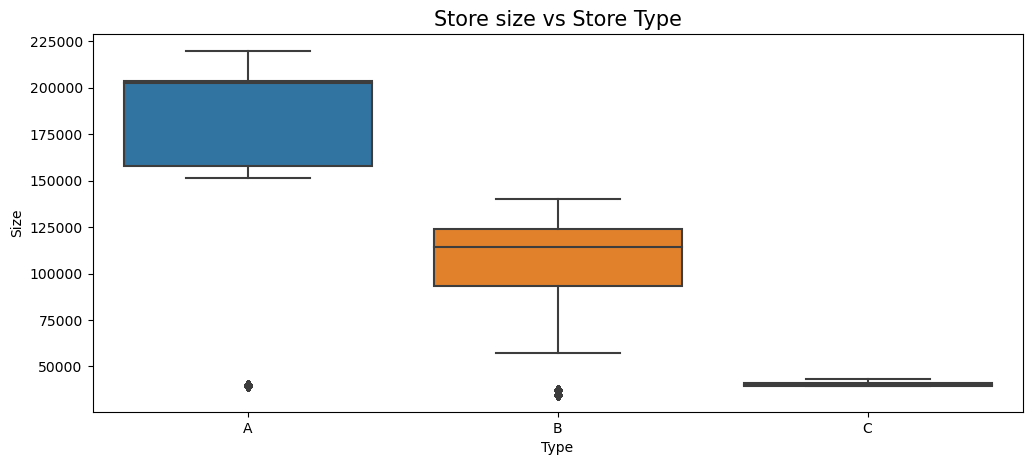

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
sns.boxplot(x=df1['Type'],y=df1['Size'])
plt.title('Store size vs Store Type', fontsize=15)

### Relationship between store type and average weekly sales 

(0.0, 100000.0)

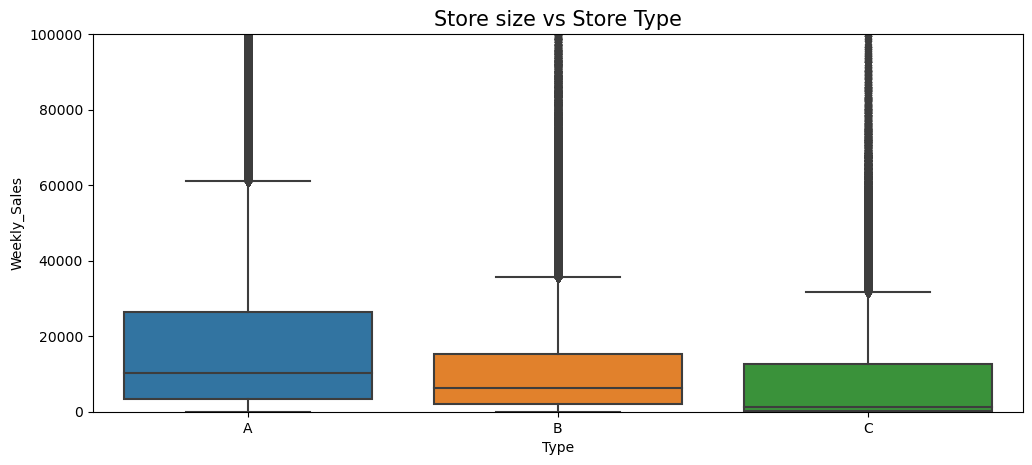

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
sns.boxplot(x=df1['Type'],y=df1['Weekly_Sales'])
plt.title('Store size vs Store Type', fontsize=15)
plt.ylim(0,100000)

From the above two boxplots we can infer that store-type A has on-average the highest size and sales followed by B and C

### Weekly sales vs Store type

Text(0.5, 1.0, 'Average weekly sales of store types')

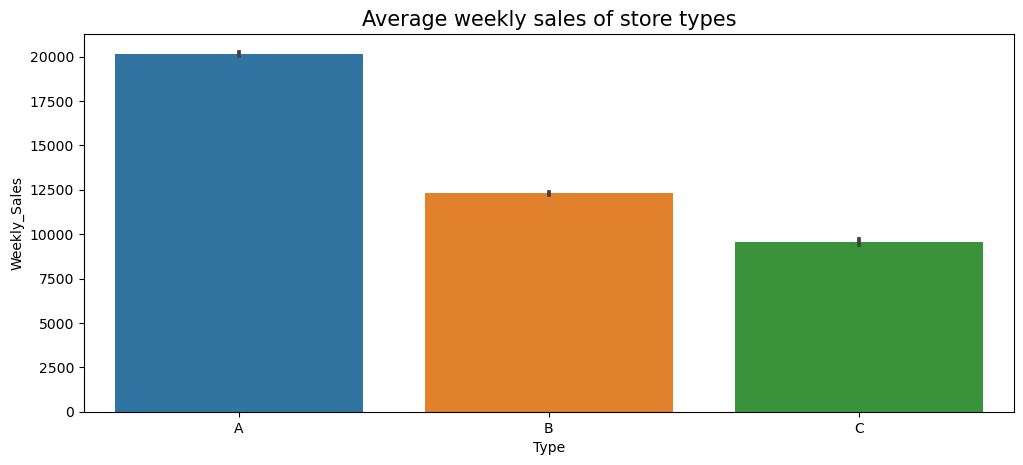

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
sns.barplot(x='Type', y='Weekly_Sales', data=df1)
plt.title('Average weekly sales of store types', fontsize=15)

Also, Store A has the highest average weekly sales


### Weekly sales by stores

Text(0.5, 1.0, 'Weely Sales By Store')

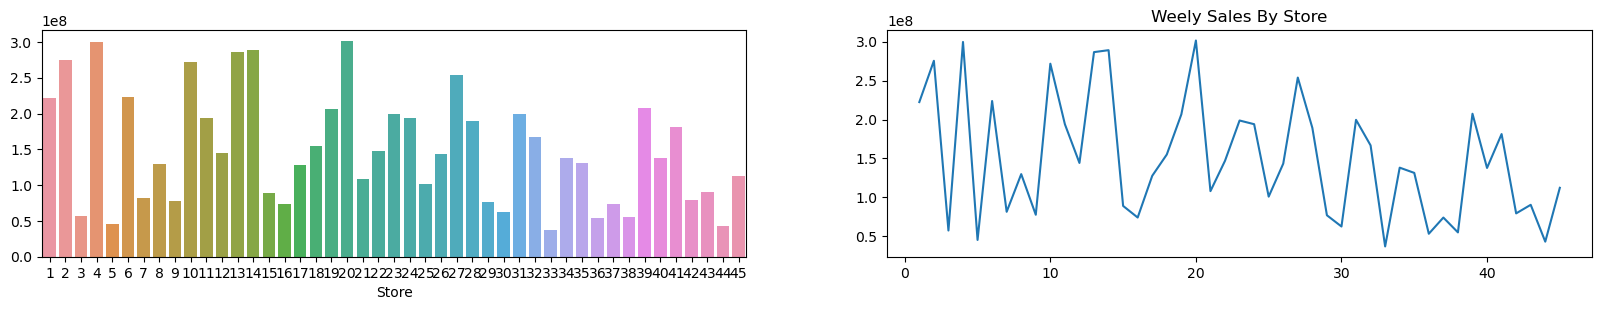

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,3), dpi=100)
plt.title('Weely Sales By Store')
store_avg = df1.groupby(by='Store')['Weekly_Sales'].sum()
plt.plot(store_avg.index,store_avg.values)

sns.barplot(x= store_avg.index, y=store_avg.values,ax = axes[0])
plt.title('Weely Sales By Store')

On average store 20 has the highest sales value followed by 4 and 14

### Sales by weeks for each year

In [ ]:
sales_2010 = df1[df1['Year']==2010].groupby(by='Week_of_year').sum()
sales_2011 = df1[df1['Year']==2011].groupby(by='Week_of_year').sum()
sales_2012 = df1[df1['Year']==2012].groupby(by='Week_of_year').sum()

Text(0, 0.5, 'Average sales')

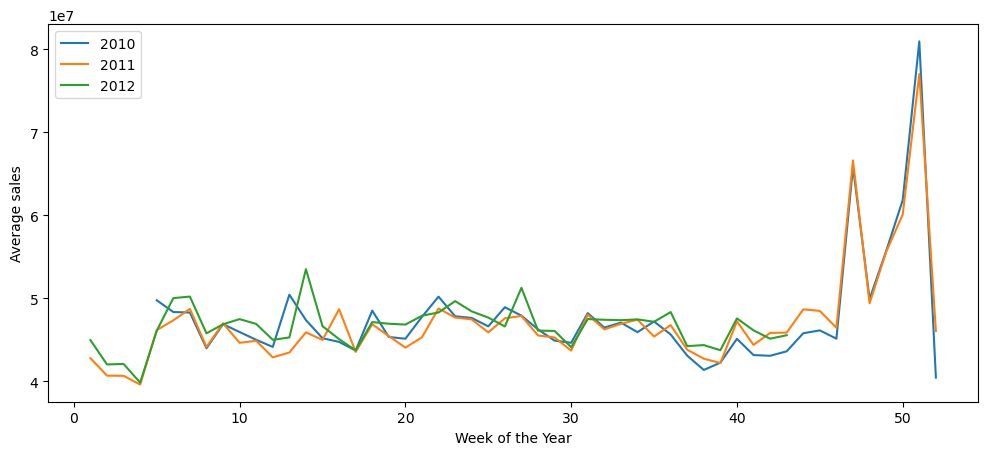

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(sales_2010.index,sales_2010['Weekly_Sales'],label='2010')
plt.plot(sales_2011.index,sales_2011['Weekly_Sales'],label='2011')
plt.plot(sales_2012.index,sales_2012['Weekly_Sales'],label='2012')
plt.legend()
plt.xlabel('Week of the Year')
plt.ylabel('Average sales')


The averge sales trend is similar for each year. We can see that the week which had a holiday in it has higher sales in that particular region. For the Holiday Weeks i.e 5,35,46,51 we can see a sudden spike in the graph.

### Sales by months for each year

In [ ]:
m_sales_2010 = df1[df1['Year']==2010].groupby(by='Month').sum()
m_sales_2011 = df1[df1['Year']==2011].groupby(by='Month').sum()
m_sales_2012 = df1[df1['Year']==2012].groupby(by='Month').sum()


Text(0, 0.5, 'Average sales')

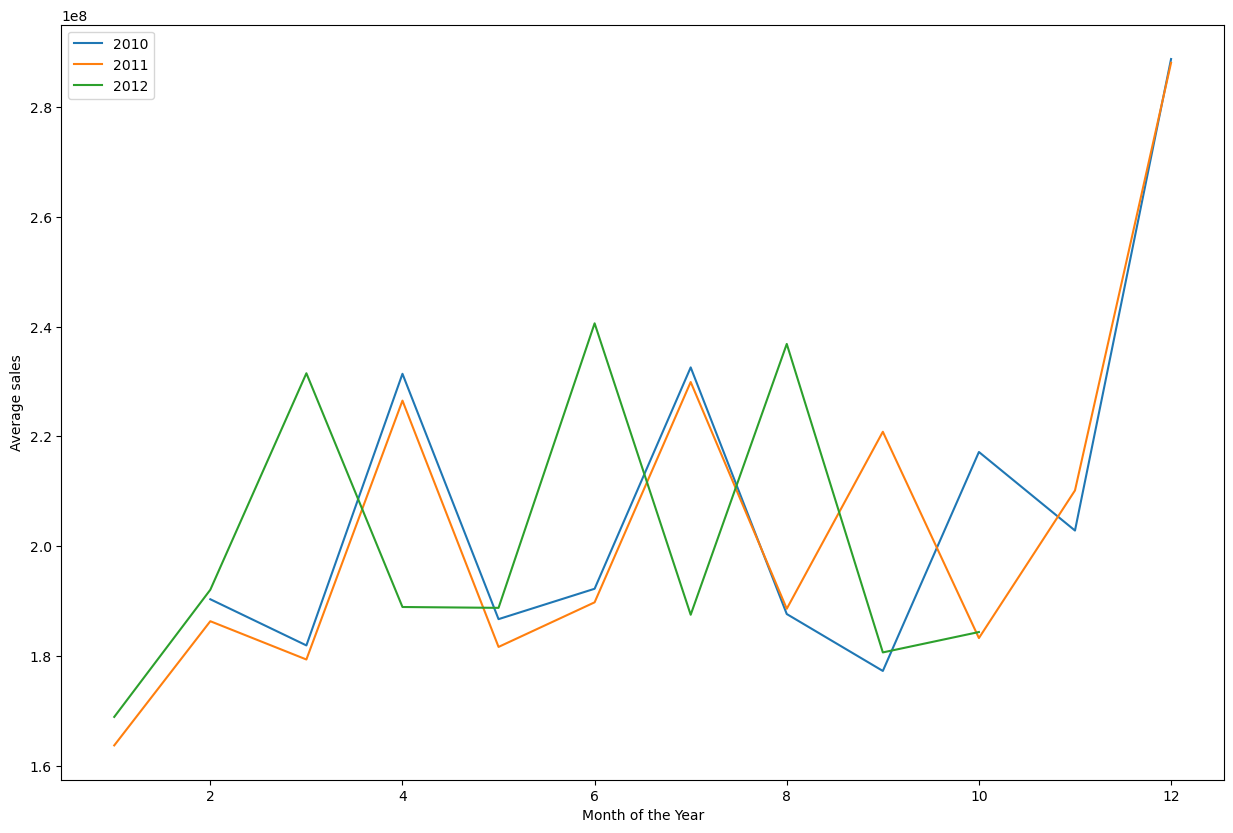

In [ ]:
plt.figure(figsize=(15,10), dpi=100)
plt.plot(m_sales_2010.index,m_sales_2010['Weekly_Sales'],label='2010')
plt.plot(m_sales_2011.index,m_sales_2011['Weekly_Sales'],label='2011')
plt.plot(m_sales_2012.index,m_sales_2012['Weekly_Sales'],label='2012')
plt.legend()
plt.xlabel('Month of the Year')
plt.ylabel('Average sales')

Since our data contains Holidays on weekly basis, the Sales by Months graph does not provide much information as the Sales by weeks graph. However we can see that the highest sales is seen at the end of each year

In [ ]:
x= df1[df1['Year']==2010]
x.loc[(x['Dept']==1) & (x['Store']==1)].sort_values(by = 'Week_of_year')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week_of_year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,5.0
73,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,12,6.0
145,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,19,7.0
218,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,26,8.0
290,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,5,9.0
363,1,1,2010-03-12,21043.39,False,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,8.106,A,151315,2010,3,12,10.0
436,1,1,2010-03-19,22136.64,False,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,8.106,A,151315,2010,3,19,11.0
508,1,1,2010-03-26,26229.21,False,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,8.106,A,151315,2010,3,26,12.0
580,1,1,2010-04-02,57258.43,False,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,7.808,A,151315,2010,4,2,13.0
652,1,1,2010-04-09,42960.91,False,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,7.808,A,151315,2010,4,9,14.0
